In [1]:
import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt
dataset = pd.read_csv('database_gmal1801.csv')

/home/dufesweeney_gmail_com/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (56) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
dataset.dropna (axis=1, how='all', inplace=True)
dataset.replace ('None', 0, regex=True, inplace=True)
dataset.drop (columns=['Unnamed: 0', 'assettypenumber', 'primaryloanservicername'], inplace=True)

In [3]:
dataset.head()

,assetnumber,reportingperiodbeginningdate,reportingperiodendingdate,originatorname,originationdate,originalloanamount,originalloanterm,loanmaturitydate,originalinterestratepercentage,interestcalculationtypecode,...,zerobalanceeffectivedate,zerobalancecode,currentdelinquencystatus,assetsubjectdemandindicator,chargedoffprincipalamount,recoveredamount,modificationtypecode,paymentextendednumber,repossessedindicator,repossessedproceedsamount
0,0001724128 - 000001,07-01-2019,07-31-2019,GM FINANCIAL,11/2015,16477.10,73,03/2022,0.0645,1,...,NaN,NaN,7.0,False,0.0,0.0,NaN,0,False,0.0
1,0001724128 - 000002,07-01-2019,07-31-2019,GM FINANCIAL,11/2015,25507.47,76,10/2022,0.0280,1,...,NaN,NaN,0.0,False,0.0,0.0,NaN,0,False,0.0
2,0001724128 - 000005,07-01-2019,07-31-2019,GM FINANCIAL,11/2015,42746.64,61,03/2021,0.0665,1,...,NaN,NaN,11.0,False,0.0,0.0,NaN,0,False,0.0
3,0001724128 - 000008,07-01-2019,07-31-2019,GM FINANCIAL,11/2015,24377.86,74,04/2022,0.1080,1,...,NaN,NaN,88.0,False,0.0,0.0,NaN,0,False,0.0
4,0001724128 - 000009,07-01-2019,07-31-2019,GM FINANCIAL,11/2015,49155.07,74,08/2022,0.0625,1,...,NaN,NaN,16.0,False,0.0,0.0,NaN,0,False,0.0


In [4]:
dataset.shape

(1021633, 64)

In [5]:
# var_factors = ['interestcalculationtypecode', 'interestcalculationtypecode', 'underwritingindicator', 'paymenttypecode',
#                'subvented', 'vehiclenewusedcode', 'vehicletypecode', 'vehiclevaluesourcecode',
#                'obligoremploymentverificationcode',
#                'obligorincomeverificationlevelcode', 'coobligorindicator', 'obligorgeographiclocation',
#                'assetaddedindicator',
#                'reportingperiodmodificationindicator', 'servicingadvancemethodcode', 'assetsubjectdemandindicator',
#                'repossessedindicator']
# var_num = ['originalloanamount', 'originalloanterm', 'originalinterestratepercentage', 'vehiclevalueamount',
#               'obligorcreditscore',
#               'paymenttoincomepercentage', 'remainingtermtomaturitynumber', 'reportingperiodbeginningloanbalanceamount',
#               'nextreportingperiodpaymentamountdue',
#               'reportingperiodinterestratepercentage', 'nextinterestratepercentage', 'servicingfeepercentage',
#               'servicingflatfeeamount',
#               'otherservicerfeeretainedbyservicer', 'otherassesseduncollectedservicerfeeamount',
#               'scheduledinterestamount', 'scheduledprincipalamount',
#               'otherprincipaladjustmentamount', 'reportingperiodactualendbalanceamount',
#               'reportingperiodscheduledpaymentamount', 'totalactualamountpaid',
#               'actualinterestcollectedamount', 'actualprincipalcollectedamount', 'actualothercollectedamount',
#               'serviceradvancedamount',
#               'chargedoffprincipalamount', 'recoveredamount', 'repossessedproceedsamount',
#               'zerobalancecode']
var = ['nextreportingperiodpaymentamountdue', 'reportingperiodscheduledpaymentamount', 'scheduledprincipalamount',
    'originalloanamount', 'reportingperiodbeginningloanbalanceamount', 'actualprincipalcollectedamount',
    'totalactualamountpaid', 'reportingperiodactualendbalanceamount', 'scheduledinterestamount',
    'vehiclevalueamount', 'remainingtermtomaturitynumber', 'actualinterestcollectedamount', 'obligorcreditscore',
    'paymenttoincomepercentage', 'originalinterestratepercentage', 'reportingperiodinterestratepercentage',
    'nextinterestratepercentage', 'originalloanterm']
# Get all the column index for independent variables
column_num = [dataset.columns.get_loc (i) for i in var]
# Creat dependent variables
dataset['Delinquency'] = dataset.loc[:, 'currentdelinquencystatus'] > 31
var_drop = list(set(dataset.columns.values)-set(var))
# dataset = pd.get_dummies(dataset, columns=var_factors)

In [6]:
zerobalance = dataset[ dataset['zerobalancecode'] > 0  ].index
dataset.drop(zerobalance, inplace=True)

In [7]:
X = dataset.drop (columns=var_drop)
y = dataset['Delinquency']

In [8]:
X.shape

(1005174, 18)

In [9]:
X_na = X.loc[:, X.isna().any()]

In [10]:
X_na.head()

,paymenttoincomepercentage,reportingperiodinterestratepercentage
0,0.0364,0.0645
1,0.0564,0.0280
2,0.0917,0.0665
3,0.1601,0.1080
4,0.1209,0.0625


In [11]:
# from missingpy import MissForest
# imputer = MissForest()
# X_impute = imputer.fit_transform(X_na)

In [12]:
from sklearn.impute import SimpleImputer
import numpy as np
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
X_impute = imp_mean.fit_transform(X_na)

In [13]:
X_impute = pd.DataFrame(X_impute, columns=list(X_na.columns.values))

In [14]:
# X.update(X_impute, overwrite=True)

In [15]:
X.drop(columns=['paymenttoincomepercentage', 'reportingperiodinterestratepercentage'], inplace=True)

In [16]:
X['paymenttoincomepercentage'] = X_impute.loc[:, 'paymenttoincomepercentage'].values
X['reportingperiodinterestratepercentage'] = X_impute.loc[:, 'reportingperiodinterestratepercentage'].values

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
X_train = X_train.values
X_validation = X_test.values
y_train = y_train.values
y_validation = y_test.values

In [19]:
print('X_shapes:\n', 'X_train:', 'X_validation:\n', X_train.shape, X_validation.shape, '\n')
print('Y_shapes:\n', 'Y_train:', 'Y_validation:\n', y_train.shape, y_validation.shape)

X_shapes:
 X_train: X_validation:
 (804139, 18) (201035, 18) 

Y_shapes:
 Y_train: Y_validation:
 (804139,) (201035,)


In [20]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

In [21]:
##Spot-Checking Algorithms
models = []

models.append(('LR', LogisticRegression(n_jobs=8)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('XGB', XGBClassifier(n_jobs=8)))
models.append(('RF', RandomForestClassifier(n_jobs=8)))

In [22]:
#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=5)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.996706 (0.001081)
LDA: 0.990097 (0.001319)
CART: 0.944552 (0.007062)
XGB: 0.999489 (0.000368)
RF: 0.999433 (0.000252)


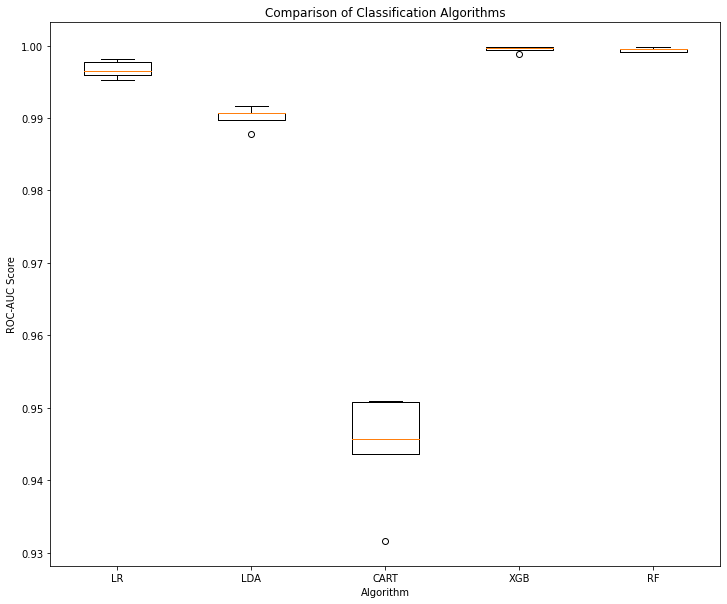

In [23]:
#Compare Algorithms

fig, ax = plt.subplots(figsize=(12, 10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [24]:
xgb = XGBClassifier(n_jobs=8)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [25]:
X_test = X_test.values
preds = xgb.predict(X_test)
print(pd.crosstab(y_test, preds, rownames=['Actual '], colnames=['Predicted ']))

Predicted    False  True 
Actual                   
False       199609     81
True            83   1262


In [26]:
import joblib

# Save to file in the current working directory
joblib_file = "XGBoost.pkl"
joblib.dump(xgb, joblib_file)

# # Load from file
# joblib_model = joblib.load(joblib_file)

# # Calculate the accuracy and predictions
# score = joblib_model.score(Xtest, Ytest)
# print("Test score: {0:.2f} %".format(100 * score))
# Ypredict = pickle_model.predict(Xtest)

['XGBoost.pkl']

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00    199690
        True       0.94      0.94      0.94      1345

    accuracy                           1.00    201035
   macro avg       0.97      0.97      0.97    201035
weighted avg       1.00      1.00      1.00    201035



In [28]:
from sklearn.metrics import roc_curve

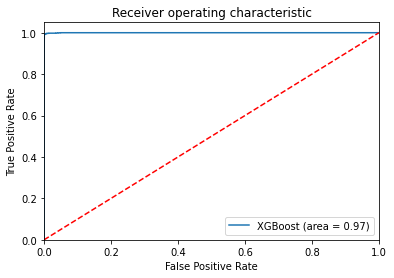

In [29]:
random_roc_auc = roc_auc_score(y_test, xgb.predict(X_test))
random_fpr, random_tpr, random_thresholds = roc_curve(y_test, xgb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(random_fpr, random_tpr, label='XGBoost (area = %0.2f)' % random_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [30]:
importance_df = pd.DataFrame(list(zip(X, xgb.feature_importances_)), columns=['Features', 'Importances'])
importance_df = importance_df.sort_values(by=['Importances'], ascending=False)
plot_importance = importance_df.head(10)

In [31]:
importance_df.head(10)

,Features,Importances
12,reportingperiodscheduledpaymentamount,0.373611
15,actualprincipalcollectedamount,0.267344
7,nextreportingperiodpaymentamountdue,0.139447
13,totalactualamountpaid,0.026750
10,scheduledprincipalamount,0.023462
3,vehiclevalueamount,0.020602
11,reportingperiodactualendbalanceamount,0.019929
17,reportingperiodinterestratepercentage,0.016669
6,reportingperiodbeginningloanbalanceamount,0.016501
1,originalloanterm,0.012572


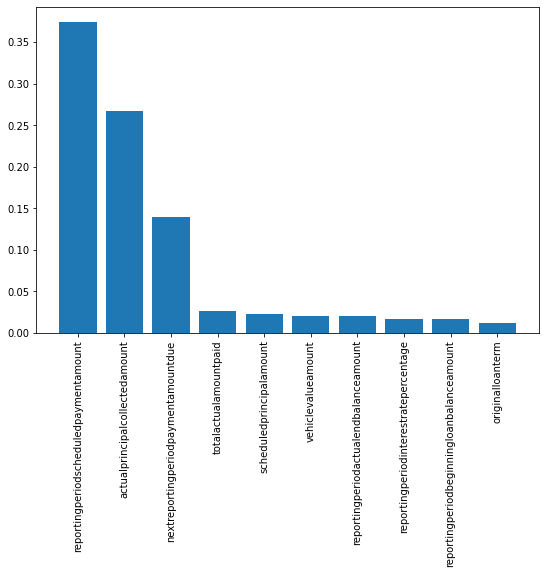

In [32]:
fig, ax = plt.subplots(figsize=(9, 6))
plt.bar(x=plot_importance['Features'], height=plot_importance['Importances'])
plt.xticks(rotation=90)
plt.show()

In [33]:
cart = DecisionTreeClassifier()
cart.fit(X_train, y_train)
preds = cart.predict(X_test)
print(pd.crosstab(y_test, preds, rownames=['Actual '], colnames=['Predicted ']))

Predicted    False  True 
Actual                   
False       199583    107
True           143   1202


In [34]:
# Save to file in the current working directory
joblib_file = "CART.pkl"
joblib.dump(cart, joblib_file)

['CART.pkl']

In [35]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00    199690
        True       0.92      0.89      0.91      1345

    accuracy                           1.00    201035
   macro avg       0.96      0.95      0.95    201035
weighted avg       1.00      1.00      1.00    201035



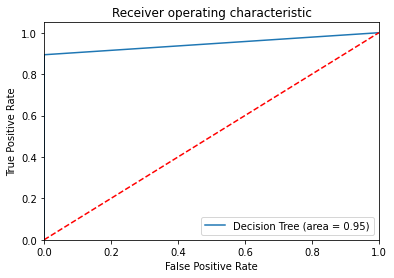

In [36]:
random_roc_auc = roc_auc_score(y_test, cart.predict(X_test))
random_fpr, random_tpr, random_thresholds = roc_curve(y_test, cart.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(random_fpr, random_tpr, label='Decision Tree (area = %0.2f)' % random_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [37]:
importance_df = pd.DataFrame(list(zip(X, cart.feature_importances_)), columns=['Features', 'Importances'])
importance_df = importance_df.sort_values(by=['Importances'], ascending=False)
plot_importance = importance_df.head(10)

In [38]:
importance_df.head(10)

,Features,Importances
12,reportingperiodscheduledpaymentamount,0.615989
7,nextreportingperiodpaymentamountdue,0.274307
10,scheduledprincipalamount,0.016753
15,actualprincipalcollectedamount,0.016187
3,vehiclevalueamount,0.010277
16,paymenttoincomepercentage,0.009543
4,obligorcreditscore,0.009234
11,reportingperiodactualendbalanceamount,0.008331
9,scheduledinterestamount,0.007873
5,remainingtermtomaturitynumber,0.006694


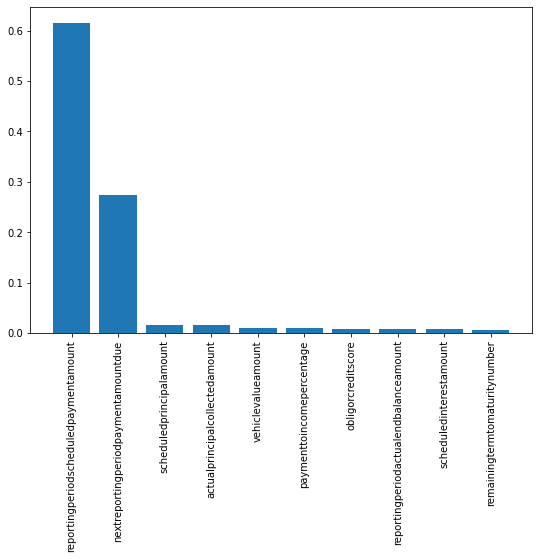

In [39]:
fig, ax = plt.subplots(figsize=(9, 6))
plt.bar(x=plot_importance['Features'], height=plot_importance['Importances'])
plt.xticks(rotation=90)
plt.show()

In [40]:
RF = RandomForestClassifier(n_jobs=8)
RF.fit(X_train, y_train)

preds = RF.predict(X_test)
print(pd.crosstab(y_test.values.flatten(), preds, rownames=['Actual '], colnames=['Predicted ']))

Predicted    False  True 
Actual                   
False       199601     89
True           162   1183


In [41]:
# Save to file in the current working directory
joblib_file = "RandomForest.pkl"
joblib.dump(RF, joblib_file)

['RandomForest.pkl']

In [42]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00    199690
        True       0.93      0.88      0.90      1345

    accuracy                           1.00    201035
   macro avg       0.96      0.94      0.95    201035
weighted avg       1.00      1.00      1.00    201035



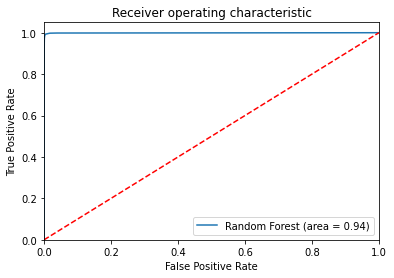

In [43]:
random_roc_auc = roc_auc_score(y_test, RF.predict(X_test))
random_fpr, random_tpr, random_thresholds = roc_curve(y_test, RF.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(random_fpr, random_tpr, label='Random Forest (area = %0.2f)' % random_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [44]:
importance_df = pd.DataFrame(list(zip(X, RF.feature_importances_)), columns=['Features', 'Importances'])
importance_df = importance_df.sort_values(by=['Importances'], ascending=False)
plot_importance = importance_df.head(10)

In [45]:
sum(importance_df.head(20).loc[:, 'Importances'])

0.9999999999999999

In [46]:
importance_df.head(20)

,Features,Importances
7,nextreportingperiodpaymentamountdue,0.398832
12,reportingperiodscheduledpaymentamount,0.130796
10,scheduledprincipalamount,0.077190
0,originalloanamount,0.073833
3,vehiclevalueamount,0.036335
15,actualprincipalcollectedamount,0.035571
13,totalactualamountpaid,0.034722
11,reportingperiodactualendbalanceamount,0.031627
6,reportingperiodbeginningloanbalanceamount,0.031471
9,scheduledinterestamount,0.028946


In [47]:
# ['nextreportingperiodpaymentamountdue', 'reportingperiodscheduledpaymentamount', 'scheduledprincipalamount',
# 'originalloanamount', 'reportingperiodbeginningloanbalanceamount', 'actualprincipalcollectedamount',
# 'totalactualamountpaid', 'reportingperiodactualendbalanceamount', 'scheduledinterestamount',
# 'vehiclevalueamount', 'remainingtermtomaturitynumber', 'actualinterestcollectedamount', 'obligorcreditscore',
# 'paymenttoincomepercentage', 'originalinterestratepercentage', 'reportingperiodinterestratepercentage',
# 'nextinterestratepercentage', 'originalloanterm']

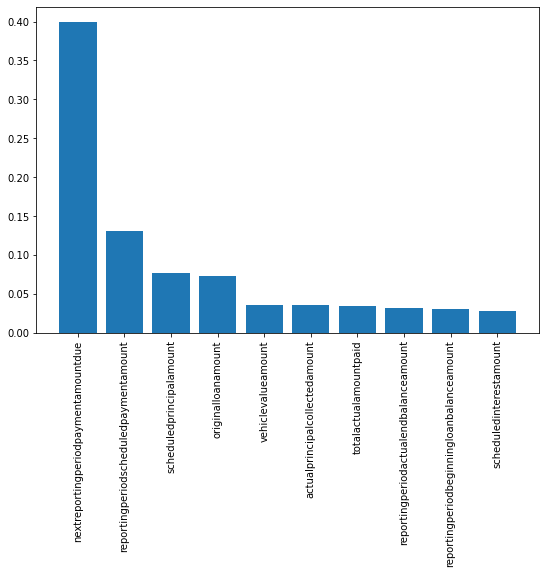

In [48]:
fig, ax = plt.subplots(figsize=(9, 6))
plt.bar(x=plot_importance['Features'], height=plot_importance['Importances'])
plt.xticks(rotation=90)
plt.show()

In [49]:
# df = pd.DataFrame(X_impute, columns=list(X.columns.values))
# df.loc[:, 'Delinquency'] = y.values
# df.to_csv("database_gmal1801_impute.csv")

In [50]:
# X_test.loc[:, X_test.columns.duplicated()].head()
# df = X_test['interestcalculationtypecode_1'] # duplicated column
# import numpy as np
# np.where(df.iloc[:,0] != df.iloc[:,1])

In [52]:
X.head()

,originalloanamount,originalloanterm,originalinterestratepercentage,vehiclevalueamount,obligorcreditscore,remainingtermtomaturitynumber,reportingperiodbeginningloanbalanceamount,nextreportingperiodpaymentamountdue,nextinterestratepercentage,scheduledinterestamount,scheduledprincipalamount,reportingperiodactualendbalanceamount,reportingperiodscheduledpaymentamount,totalactualamountpaid,actualinterestcollectedamount,actualprincipalcollectedamount,paymenttoincomepercentage,reportingperiodinterestratepercentage
0,16477.10,73,0.0645,17767.0,583,32,8699.75,542.05,0.0645,39.822031,237.507969,8467.87,277.33,278.0,46.12,231.88,0.0364,0.0645
1,25507.47,76,0.0280,21338.0,802,39,14328.38,371.12,0.0280,26.671197,344.448803,13984.96,371.12,372.0,28.58,343.42,0.0564,0.0280
2,42746.64,61,0.0665,35075.0,774,20,16494.95,1680.62,0.0665,75.268551,765.041449,16494.95,840.31,0.0,0.00,0.00,0.0917,0.0665
3,24377.86,74,0.1080,18122.0,649,33,15259.17,1846.34,0.1080,108.778559,354.681441,15259.17,463.46,0.0,0.00,0.00,0.1601,0.1080
4,49155.07,74,0.0625,45843.0,690,37,28828.25,1640.60,0.0625,118.398005,704.051995,28828.25,822.45,0.0,0.00,0.00,0.1209,0.0625


In [53]:
X.to_csv('X.csv')

In [17]:
corrMat = X.corr()

In [18]:
corrMat['actualprincipalcollectedamount']

originalloanamount                           0.317929
originalloanterm                            -0.066090
originalinterestratepercentage              -0.146026
vehiclevalueamount                           0.286783
remainingtermtomaturitynumber               -0.054282
reportingperiodbeginningloanbalanceamount    0.250758
nextreportingperiodpaymentamountdue          0.227778
nextinterestratepercentage                  -0.146030
scheduledinterestamount                     -0.021869
scheduledprincipalamount                     0.348983
reportingperiodactualendbalanceamount        0.193772
reportingperiodscheduledpaymentamount        0.340996
totalactualamountpaid                        0.994967
actualinterestcollectedamount                0.021546
actualprincipalcollectedamount               1.000000
paymenttoincomepercentage                    0.059065
reportingperiodinterestratepercentage       -0.146022
Name: actualprincipalcollectedamount, dtype: float64

In [19]:
corrMat

,originalloanamount,originalloanterm,originalinterestratepercentage,vehiclevalueamount,remainingtermtomaturitynumber,reportingperiodbeginningloanbalanceamount,nextreportingperiodpaymentamountdue,nextinterestratepercentage,scheduledinterestamount,scheduledprincipalamount,reportingperiodactualendbalanceamount,reportingperiodscheduledpaymentamount,totalactualamountpaid,actualinterestcollectedamount,actualprincipalcollectedamount,paymenttoincomepercentage,reportingperiodinterestratepercentage
originalloanamount,1.000000,0.167173,-0.318546,0.789461,0.095099,0.897919,0.793195,-0.318578,0.102473,0.910836,0.890855,0.930159,0.324870,0.092008,0.317929,0.203824,-0.318583
originalloanterm,0.167173,1.000000,0.280943,-0.063109,0.722688,0.281814,-0.023435,0.280922,0.372052,-0.177145,0.289647,-0.082212,-0.033163,0.323843,-0.066090,0.062170,0.280924
originalinterestratepercentage,-0.318546,0.280943,1.000000,-0.439366,0.261962,-0.199049,-0.132868,0.999981,0.788597,-0.442169,-0.192853,-0.240477,-0.077133,0.677110,-0.146026,0.045944,0.999933
vehiclevalueamount,0.789461,-0.063109,-0.439366,1.000000,-0.072986,0.669144,0.624574,-0.439379,-0.071483,0.792831,0.660841,0.769197,0.278478,-0.062312,0.286783,0.080622,-0.439371
remainingtermtomaturitynumber,0.095099,0.722688,0.261962,-0.072986,1.000000,0.412053,-0.043319,0.261940,0.384905,-0.177963,0.420904,-0.079789,-0.020360,0.334502,-0.054282,0.049851,0.261947
reportingperiodbeginningloanbalanceamount,0.897919,0.281814,-0.199049,0.669144,0.412053,1.000000,0.692073,-0.199084,0.228253,0.741637,0.998211,0.793832,0.270381,0.213694,0.250758,0.195716,-0.199021
nextreportingperiodpaymentamountdue,0.793195,-0.023435,-0.132868,0.624574,-0.043319,0.692073,1.000000,-0.132887,0.212015,0.799415,0.688118,0.847111,0.240350,0.141563,0.227778,0.199077,-0.133138
nextinterestratepercentage,-0.318578,0.280922,0.999981,-0.439379,0.261940,-0.199084,-0.132887,1.000000,0.788541,-0.442188,-0.192888,-0.240509,-0.077139,0.677096,-0.146030,0.045940,0.999952
scheduledinterestamount,0.102473,0.372052,0.788597,-0.071483,0.384905,0.228253,0.212015,0.788541,1.000000,-0.098447,0.232620,0.154028,0.064619,0.861544,-0.021869,0.148436,0.788610
scheduledprincipalamount,0.910836,-0.177145,-0.442169,0.792831,-0.177963,0.741637,0.799415,-0.442188,-0.098447,1.000000,0.730451,0.968103,0.338237,-0.082251,0.348983,0.179823,-0.442135


In [20]:
Xy = X.copy()
Xy['Delinquency'] = y.values

In [21]:
corrmat_xy = Xy.corr()

In [22]:
corrmat_xy

,originalloanamount,originalloanterm,originalinterestratepercentage,vehiclevalueamount,remainingtermtomaturitynumber,reportingperiodbeginningloanbalanceamount,nextreportingperiodpaymentamountdue,nextinterestratepercentage,scheduledinterestamount,scheduledprincipalamount,reportingperiodactualendbalanceamount,reportingperiodscheduledpaymentamount,totalactualamountpaid,actualinterestcollectedamount,actualprincipalcollectedamount,paymenttoincomepercentage,reportingperiodinterestratepercentage,Delinquency
originalloanamount,1.000000,0.167173,-0.318546,0.789461,0.095099,0.897919,0.793195,-0.318578,0.102473,0.910836,0.890855,0.930159,0.324870,0.092008,0.317929,0.203824,-0.318583,0.002412
originalloanterm,0.167173,1.000000,0.280943,-0.063109,0.722688,0.281814,-0.023435,0.280922,0.372052,-0.177145,0.289647,-0.082212,-0.033163,0.323843,-0.066090,0.062170,0.280924,0.044138
originalinterestratepercentage,-0.318546,0.280943,1.000000,-0.439366,0.261962,-0.199049,-0.132868,0.999981,0.788597,-0.442169,-0.192853,-0.240477,-0.077133,0.677110,-0.146026,0.045944,0.999933,0.084827
vehiclevalueamount,0.789461,-0.063109,-0.439366,1.000000,-0.072986,0.669144,0.624574,-0.439379,-0.071483,0.792831,0.660841,0.769197,0.278478,-0.062312,0.286783,0.080622,-0.439371,-0.034186
remainingtermtomaturitynumber,0.095099,0.722688,0.261962,-0.072986,1.000000,0.412053,-0.043319,0.261940,0.384905,-0.177963,0.420904,-0.079789,-0.020360,0.334502,-0.054282,0.049851,0.261947,0.019997
reportingperiodbeginningloanbalanceamount,0.897919,0.281814,-0.199049,0.669144,0.412053,1.000000,0.692073,-0.199084,0.228253,0.741637,0.998211,0.793832,0.270381,0.213694,0.250758,0.195716,-0.199021,0.008623
nextreportingperiodpaymentamountdue,0.793195,-0.023435,-0.132868,0.624574,-0.043319,0.692073,1.000000,-0.132887,0.212015,0.799415,0.688118,0.847111,0.240350,0.141563,0.227778,0.199077,-0.133138,0.272463
nextinterestratepercentage,-0.318578,0.280922,0.999981,-0.439379,0.261940,-0.199084,-0.132887,1.000000,0.788541,-0.442188,-0.192888,-0.240509,-0.077139,0.677096,-0.146030,0.045940,0.999952,0.084836
scheduledinterestamount,0.102473,0.372052,0.788597,-0.071483,0.384905,0.228253,0.212015,0.788541,1.000000,-0.098447,0.232620,0.154028,0.064619,0.861544,-0.021869,0.148436,0.788610,0.075570
scheduledprincipalamount,0.910836,-0.177145,-0.442169,0.792831,-0.177963,0.741637,0.799415,-0.442188,-0.098447,1.000000,0.730451,0.968103,0.338237,-0.082251,0.348983,0.179823,-0.442135,-0.015009


In [61]:
corrmat_xy['Delinquency']

originalloanamount                           0.002412
originalloanterm                             0.044138
originalinterestratepercentage               0.084827
vehiclevalueamount                          -0.034186
remainingtermtomaturitynumber                0.019997
reportingperiodbeginningloanbalanceamount    0.008623
nextreportingperiodpaymentamountdue          0.272463
nextinterestratepercentage                   0.084836
scheduledinterestamount                      0.075570
scheduledprincipalamount                    -0.015009
reportingperiodactualendbalanceamount        0.010232
reportingperiodscheduledpaymentamount        0.004124
totalactualamountpaid                       -0.017634
actualinterestcollectedamount                0.019885
actualprincipalcollectedamount              -0.019802
paymenttoincomepercentage                    0.024470
reportingperiodinterestratepercentage        0.084702
Delinquency                                  1.000000
Name: Delinquency, dtype: fl

In [63]:
Xy.loc[:, 'Delinquency'] > 90

0          False
1          False
2          False
3          False
4          False
           ...  
1021628    False
1021629    False
1021630    False
1021631    False
1021632    False
Name: Delinquency, Length: 1005174, dtype: bool

In [71]:
dataset.loc[dataset.loc[:, 'currentdelinquencystatus'] > 90]

,assetnumber,reportingperiodbeginningdate,reportingperiodendingdate,originatorname,originationdate,originalloanamount,originalloanterm,loanmaturitydate,originalinterestratepercentage,interestcalculationtypecode,...,zerobalancecode,currentdelinquencystatus,assetsubjectdemandindicator,chargedoffprincipalamount,recoveredamount,modificationtypecode,paymentextendednumber,repossessedindicator,repossessedproceedsamount,Delinquency
99,0001724128 - 000168,07-01-2019,07-31-2019,GM FINANCIAL,11/2015,48809.46,74,12/2021,0.0470,1,...,NaN,115.0,False,0.00,0.0,NaN,0,False,0.0,True
1371,0001724128 - 002161,07-01-2019,07-31-2019,GM FINANCIAL,12/2015,47012.59,74,07/2022,0.0880,1,...,NaN,99.0,False,0.00,0.0,NaN,0,False,0.0,True
2017,0001724128 - 003115,07-01-2019,07-31-2019,GM FINANCIAL,07/2016,38154.97,73,01/2023,0.0745,1,...,NaN,104.0,False,0.00,0.0,NaN,0,False,0.0,True
6652,0001724128 - 009513,07-01-2019,07-31-2019,GM FINANCIAL,02/2017,12469.00,74,03/2023,0.0848,1,...,NaN,109.0,False,0.00,0.0,NaN,0,False,0.0,True
12301,0001724128 - 017167,07-01-2019,07-31-2019,GM FINANCIAL,03/2017,8558.62,62,04/2022,0.0790,1,...,NaN,113.0,False,0.00,0.0,NaN,0,False,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923495,0001724128 - 039985,11-01-2018,11-30-2018,GM FINANCIAL,07/2017,19421.00,73,09/2023,0.0945,1,...,NaN,102.0,False,0.00,0.0,NaN,0,False,0.0,True
923746,0001724128 - 040264,11-01-2018,11-30-2018,GM FINANCIAL,07/2017,69265.28,73,11/2023,0.0880,1,...,NaN,102.0,False,0.00,0.0,NaN,0,False,0.0,True
927713,0001724128 - 044993,11-01-2018,11-30-2018,GM FINANCIAL,08/2017,15293.00,76,11/2023,0.1005,1,...,NaN,105.0,False,0.00,0.0,NaN,0,False,0.0,True
927863,0001724128 - 045172,11-01-2018,11-30-2018,GM FINANCIAL,07/2017,20931.50,77,11/2023,0.0499,1,...,NaN,108.0,False,0.00,0.0,NaN,0,False,0.0,True


In [ ]:
# We are predicting the "current period", or things we already know. Next step we should train the model with X
# from 2017 and predict from 2018
# Further, we should train model on 2017, and predict default on 2018, 2019...

In [25]:
corrMat['originalinterestratepercentage']

originalloanamount                          -0.318546
originalloanterm                             0.280943
originalinterestratepercentage               1.000000
vehiclevalueamount                          -0.439366
remainingtermtomaturitynumber                0.261962
reportingperiodbeginningloanbalanceamount   -0.199049
nextreportingperiodpaymentamountdue         -0.132868
nextinterestratepercentage                   0.999981
scheduledinterestamount                      0.788597
scheduledprincipalamount                    -0.442169
reportingperiodactualendbalanceamount       -0.192853
reportingperiodscheduledpaymentamount       -0.240477
totalactualamountpaid                       -0.077133
actualinterestcollectedamount                0.677110
actualprincipalcollectedamount              -0.146026
paymenttoincomepercentage                    0.045944
reportingperiodinterestratepercentage        0.999933
Name: originalinterestratepercentage, dtype: float64